> SAÉ 2.04 - Exploitation d'une base de données  
> Auteurs : LEFRANCOIS Thibaut & DEMOUGE Colin  
> Date : 05/05/2023  
---
## Notebook 3 : Chiffre d'affaires par mois par hôtel

#### Import des composants pour la connexion à la base de données

In [1]:
import cx_Oracle
import db_config
import random

#### Connexion à la base de données

In [2]:
vconnect = cx_Oracle.connect(db_config.user, db_config.pwd, db_config.dsn)

#### Requête
Requête SQL qui retourne le chiffre d'affaires généré pour un mois = `v_mois` et pour un hôtel d'ID = `v_id_hotel` donné

In [3]:
query = """
        SELECT 
            EXTRACT(MONTH FROM RC.ARRIVEE) AS mois,
            SUM(PC.PRIX) AS chiffre_affaires
        FROM 
            RESERVATION_CHAMBRE RC 
            JOIN CHAMBRE C ON RC.CHAMBRE = C.ID_CHAMBRE
            JOIN HOTEL H ON C.HOTEL = H.ID_HOTEL
            JOIN PRIX_CHAMBRE PC ON C.TYPE = PC.TYPE_CHAMBRE
        WHERE 
            H.ID_HOTEL = :v_id_hotel AND
            EXTRACT(MONTH FROM RC.ARRIVEE) = :v_mois
        GROUP BY 
            EXTRACT(MONTH FROM RC.ARRIVEE)
        ORDER BY 
            EXTRACT(MONTH FROM RC.ARRIVEE)
        """

Cette requête récupère des informations sur le chiffre d'affaires généré par chaque mois pour un hôtel spécifique, identifié par la variable liée `:v_id_hotel`.

La requête joint plusieurs tables : `RESERVATION_CHAMBRE`, `CHAMBRE`, `HOTEL`, et `PRIX_CHAMBRE`.

Elle utilise la fonction `EXTRACT` pour extraire le mois de la date d'arrivée de chaque réservation (`RC.ARRIVEE`) et la fonction `SUM` pour calculer le chiffre d'affaires généré pour chaque mois en additionnant les prix des chambres (`PC.PRIX`) pour chaque réservation.

La requête utilise la clause `WHERE` pour filtrer les résultats en ne prenant en compte que les réservations effectuées dans l'hôtel spécifié par la variable liée `:v_id_hotel` et pour le mois spécifié par la variable liée `:v_mois`.

Enfin, la requête groupe les résultats par mois en utilisant la clause `GROUP BY` sur la colonne `EXTRACT(MONTH FROM RC.ARRIVEE)` et les trie par ordre croissant des mois en utilisant la clause `ORDER BY`.

### Visualisation des données récupérées

Installation (si nécéssaire) puis importation de la librairie `matplotlib` pour visualiser les données sous forme de diagrammes. 

In [4]:
!pip install matplotlib
import matplotlib.pyplot as plot

### Définition des fonctions nécessaires à la visualisation

In [5]:
# Définition des labels des axes x et y
x_label = "Mois"
y_label = "Chiffre d'affaires"

# Création des listes pour les données x et y
x_data = [i for i in range(1, 13)]
y_data = [0] * 12

# Fonction pour exécuter la requête SQL pour chaque hôtel et chaque mois
def execute_query(id_hotel, mois):
    vcursor = cx_Oracle.Cursor(vconnect)
    vcursor.execute(query, v_id_hotel = id_hotel, v_mois = mois)
    rows = vcursor.fetchall()
    if rows:
        y_data[mois-1] = rows[0][1]
    vcursor.close() 

# Initialisation du graphique
def init_plot():
    plot.rcParams["figure.figsize"] = [10,5]
    plot.figure()
    plot.xlabel(x_label)
    plot.ylabel(y_label)
    plot.suptitle(f"Chiffres d'affaires des hôtels durant l'année 2019")

# Ajout des données au graphique
def add_data_plot(type_chart='plot'):
    plot_label = f'Chiffre d\'affaires de l\'hôtel {id_hotel}'
    color = (random.random(), random.random(), random.random())
    if (type_chart == 'plot'):
        plot.plot(x_data, y_data, color=color, label = plot_label)
    elif (type_chart == 'bar'):
        plot.bar(x_data, y_data, color=color, label = plot_label)

# Affichage du graphique
def show_plot():
    plot.legend(loc='upper right')
    plot.xticks(range(1,13)) # Ajout de cette ligne pour forcer l'affichage de tous les mois
    plot.savefig("test.png")
    plot.show()


### Exécution de la requête et visualisation du résultat : une seule visualisation

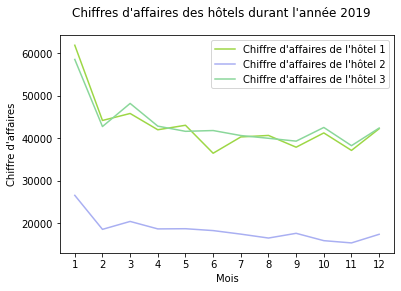

In [6]:
# Initialisation du graphique
init_plot()

# Boucle sur les hôtels
for id_hotel in range(1, 4):
    
    # Boucle sur les mois de l'année
    for mois in range(1,13):
        
        # Exécution de la requête et récupération du résultat
        execute_query(id_hotel,mois)
        
    # Ajout des données sur le graphique pour l'hôtel courant
    add_data_plot()
    
# Affichage du graphique final
show_plot()


#### Exécution de la requête et visualisation du résultat : une visualisation par hôtel

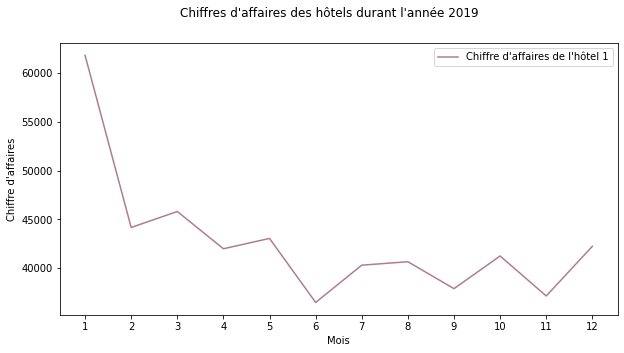

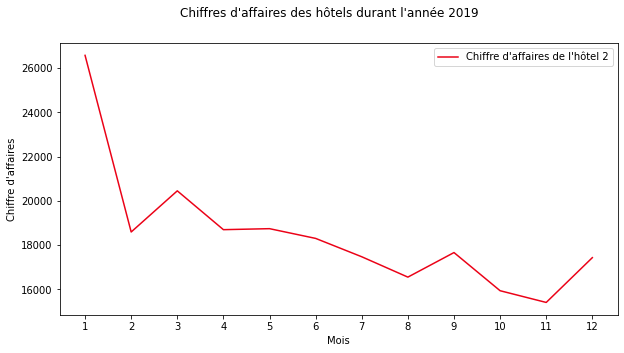

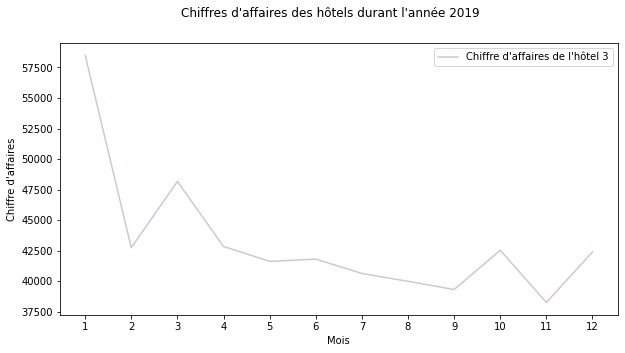

In [7]:
# Pour chaque hotel (3 en tout)
for id_hotel in range(1, 4):
    
    # Initialisation du graphique
    init_plot()
    
    # Pour chaque mois de l'année
    for mois in range(1,13):
        
        # Exécute la requête SQL pour récupérer le chiffre d'affaires de l'hôtel pour ce mois
        execute_query(id_hotel,mois)
        
    # Ajoute les données récupérées au graphique       
    add_data_plot()
    
    # Affichage du graphique final
    show_plot()

### Analyse 

On remarque que les hotel 1 et 3 font un plus grand chiffre d'affaire que l'hotel 2, cela est surement du au fait que l'hotel 2 dispose de moins de chambre et qu'il est moins bien placé que les hotel du vieux port et du centre ville. 

### Fin de l'exécution de la requête

In [10]:
vconnect.close()

InterfaceError: not connected